In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [2]:
accuracy_list = []

In [3]:
path_clas = Path('/home/ubuntu/data/autopsy/2014_2018/no_preprocessing')

batch_size=32

#drop_mult=0.3
drop_mult=0.1
learning_rate= 1e-3
#wd=1e-4
wd=0
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [4]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1, qrnn=True)
learn.freeze()

In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


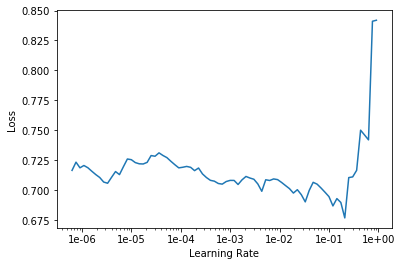

In [6]:
learn.recorder.plot()

In [7]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.598205,0.593439,0.717570
2,0.518374,0.436453,0.812808
3,0.454677,0.478887,0.773399
4,0.433033,0.309884,0.885057
5,0.374279,0.285063,0.885057
6,0.336789,0.254945,0.896552
7,0.342801,0.285983,0.893268
8,0.387376,0.259258,0.898194
9,0.344196,0.243859,0.898194
10,0.295951,0.251060,0.901478


In [8]:
learn.validate()

[0.28375816, tensor(0.9015)]

In [9]:
accuracy_list.append(learn.validate()[1].item())

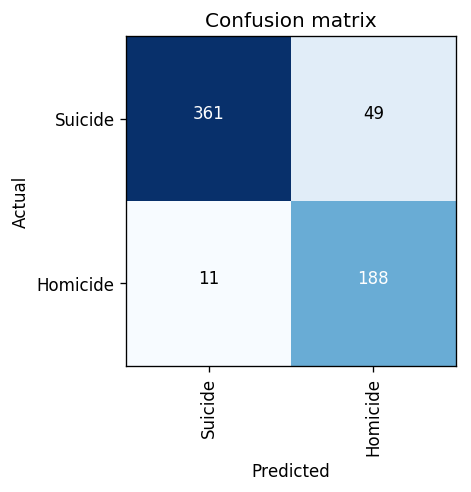

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

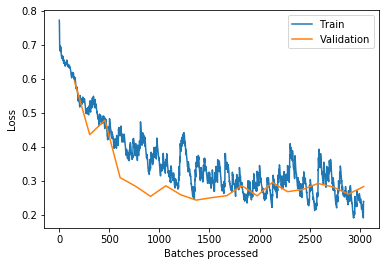

In [11]:
learn.recorder.plot_losses()

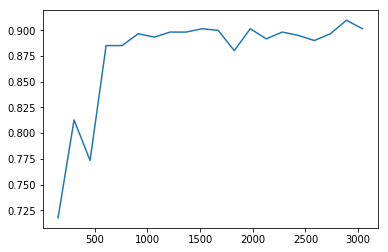

In [12]:
learn.recorder.plot_metrics()

In [13]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1, qrnn=True)
learn.freeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


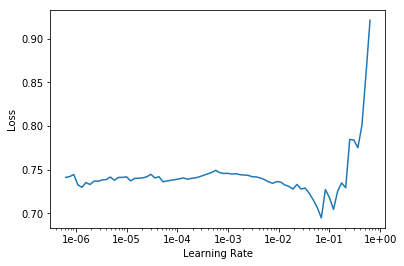

In [15]:
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.612985,0.529739,0.771757
2,0.524332,0.486518,0.789819
3,0.459235,0.345111,0.901478
4,0.410484,0.297738,0.906404
5,0.347764,0.277634,0.899836
6,0.328803,0.259117,0.906404
7,0.406432,0.233503,0.929392
8,0.318068,0.229592,0.926108
9,0.323238,0.259959,0.916256
10,0.275597,0.250818,0.909688


In [17]:
learn.validate()

[0.22819704, tensor(0.9278)]

In [18]:
accuracy_list.append(learn.validate()[1].item())

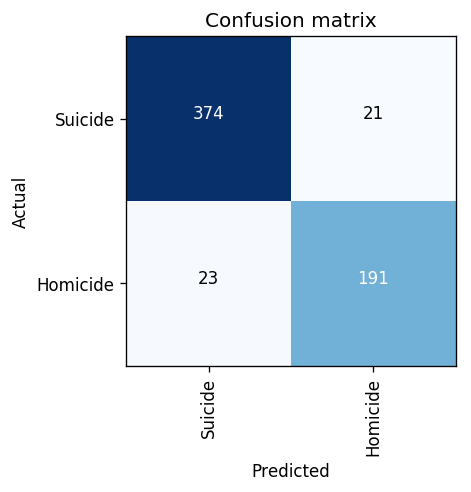

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

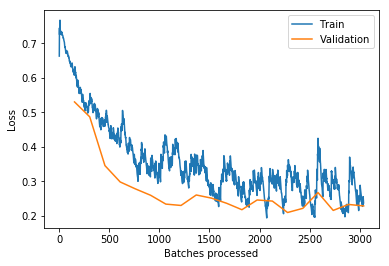

In [20]:
learn.recorder.plot_losses()

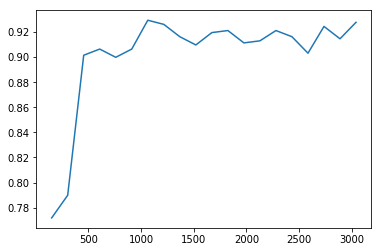

In [21]:
learn.recorder.plot_metrics()

In [22]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1, qrnn=True)
learn.freeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


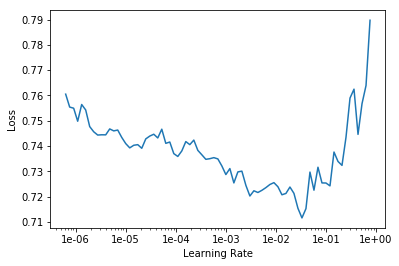

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.614511,0.492469,0.814450
2,0.562252,0.449566,0.824302
3,0.500784,0.324811,0.871921
4,0.446312,0.398052,0.850575
5,0.436634,0.281941,0.901478
6,0.379679,0.254341,0.914614
7,0.350940,0.279679,0.896552
8,0.324201,0.231896,0.919540
9,0.319259,0.328566,0.875205
10,0.277334,0.208442,0.916256


In [26]:
learn.validate()

[0.26227102, tensor(0.9015)]

In [27]:
accuracy_list.append(learn.validate()[1].item())

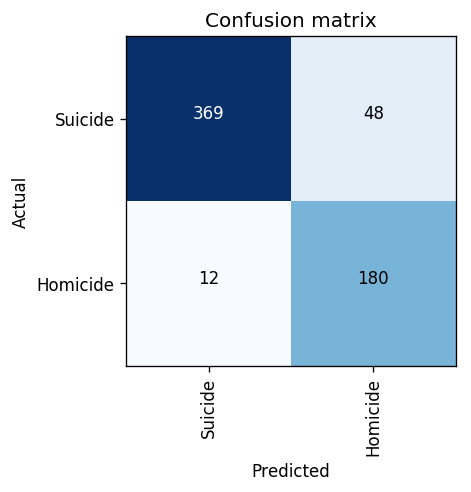

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

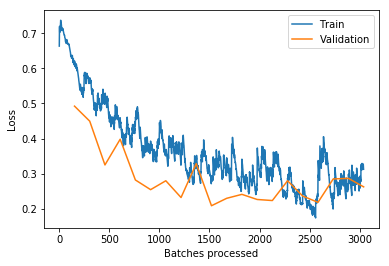

In [29]:
learn.recorder.plot_losses()

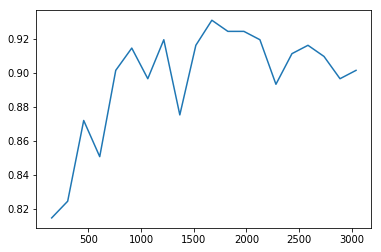

In [30]:
learn.recorder.plot_metrics()

In [31]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1, qrnn=True)
learn.freeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


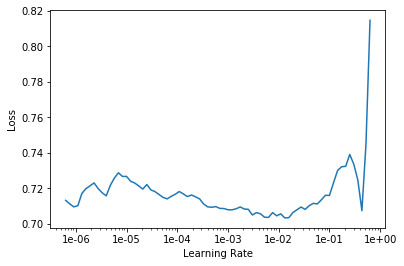

In [33]:
learn.recorder.plot()

In [34]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.621794,0.531897,0.768473
2,0.538181,0.357029,0.875205
3,0.469135,0.250679,0.926108
4,0.431057,0.246365,0.926108
5,0.419027,0.217209,0.932676
6,0.411379,0.206254,0.917898
7,0.340833,0.244004,0.917898
8,0.376607,0.217676,0.922824
9,0.296396,0.234072,0.924466
10,0.391382,0.193759,0.932676


In [35]:
learn.validate()

[0.2079871, tensor(0.9228)]

In [36]:
accuracy_list.append(learn.validate()[1].item())

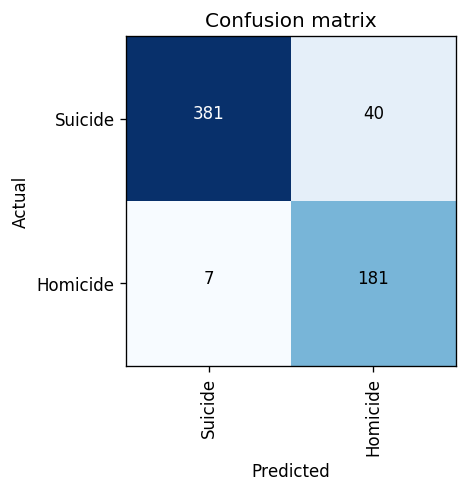

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

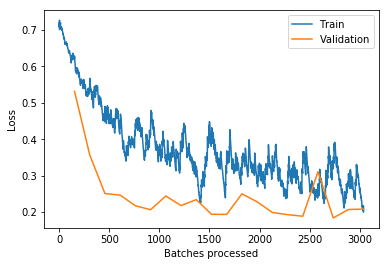

In [38]:
learn.recorder.plot_losses()

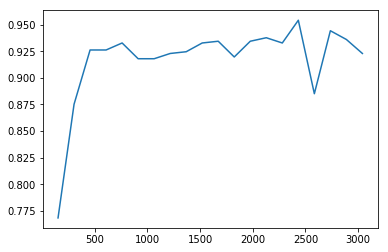

In [39]:
learn.recorder.plot_metrics()

In [40]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1, qrnn=True)
learn.freeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


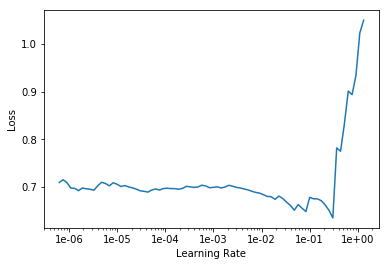

In [42]:
learn.recorder.plot()

In [43]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.572477,0.572861,0.688013
2,0.525303,0.358530,0.866995
3,0.462091,0.298867,0.912972
4,0.448494,0.342385,0.863711
5,0.380742,0.201486,0.922824
6,0.345202,0.202919,0.922824
7,0.359534,0.230815,0.916256
8,0.371988,0.209717,0.919540
9,0.335818,0.194563,0.931035
10,0.270106,0.195339,0.916256


In [44]:
learn.validate()

[0.1750628, tensor(0.9343)]

In [45]:
accuracy_list.append(learn.validate()[1].item())

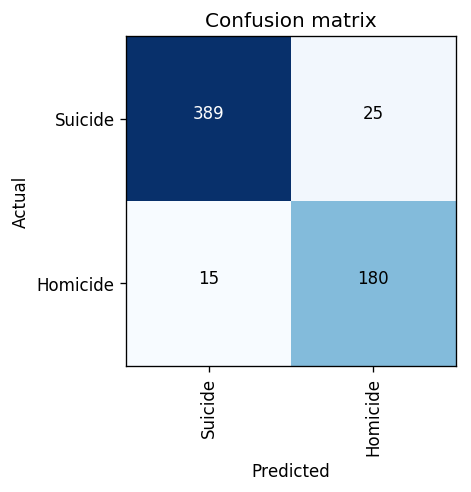

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

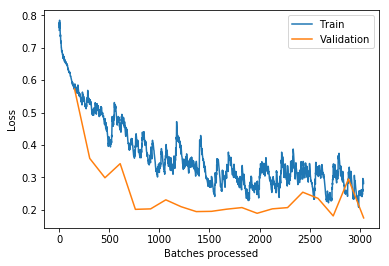

In [47]:
learn.recorder.plot_losses()

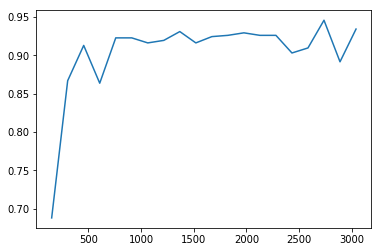

In [48]:
learn.recorder.plot_metrics()

In [49]:
print(accuracy_list)

[0.9014778137207031, 0.9277504086494446, 0.9014778137207031, 0.9228243231773376, 0.9343185424804688]


In [50]:
print(sum(accuracy_list)/len(accuracy_list))

0.9175697803497315


In [51]:
print(statistics.variance(accuracy_list))

0.00023241980644890246


In [52]:
import torch

torch.cuda.empty_cache()